<a href="https://www.pieriandata.com"><img src="../DATA/Logo.jpg"></a>

# Image Basics Assessment

## Complete the Tasks in bold below. Keep in mind, you may need to run some of these tasks as Python scripts.

----------
#### TASK: Open the *dog_backpack.jpg* image from the DATA folder and display it in the notebook. Make sure to correct for the RGB order.

In [62]:
import cv2

In [63]:
import matplotlib.pyplot as plt
import numpy as np

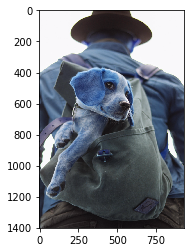

In [46]:
img = cv2.imread('../Data/dog_backpack.jpg')
plt.imshow(img)

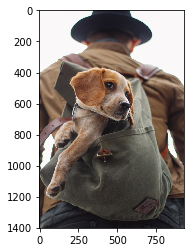

In [47]:
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img2 = img.copy()
plt.imshow(img)

#### TASK: Flip the image upside down and display it in the notebook.

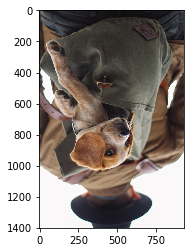

In [48]:
plt.imshow(cv2.flip(img,0))

#### TASK: Draw an empty RED rectangle around the dogs face and display the image in the notebook.

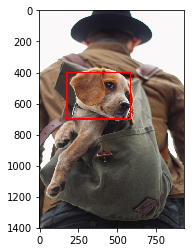

In [49]:
cv2.rectangle(img,(180,400),(590,700),(255,0,0),5)
plt.imshow(img)

#### TASK: Draw a BLUE TRIANGLE in the middle of the image. The size and angle is up to you, but it should be a triangle (three sides) in any orientation.

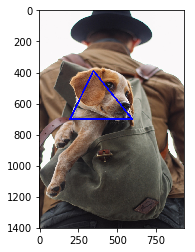

In [53]:
pts = np.array([[350,390],[600,700],[200,700]])
pts = pts.reshape(-1,1,2)
cv2.polylines(img2,[pts],isClosed=True,color=(0,0,255),thickness=9)
plt.imshow(img2)

### BONUS TASK. Can you figure our how to fill in this triangle? It requires a different function that we didn't show in the lecture! See if you can use google search to find it.

[CLICK ME FOR A DIRECT LINK TO THE HINT](https://docs.opencv.org/3.0-beta/modules/imgproc/doc/drawing_functions.html#fillpoly)

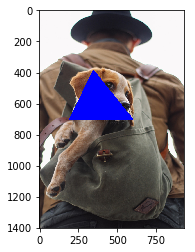

In [55]:
cv2.fillPoly(img2,[pts],color=(0,0,255))
plt.imshow(img2)

#### TASK: (NOTE: YOU WILL NEED TO RUN THIS AS A SCRIPT). Create a script that opens the picture and allows you to draw empty red circles whever you click the RIGHT MOUSE BUTTON DOWN.

In [91]:
def draw_circle(event,x,y,flags,param):
    if event == cv2.EVENT_RBUTTONDOWN:
            cv2.circle(img,(x,y),200,(0,0,255),5)
            
cv2.namedWindow('Draw your circles')
cv2.setMouseCallback('Draw your circles',draw_circle)

img = cv2.imread('../Data/dog_backpack.jpg')
img = cv2.resize(img,(0,0),img,0.8,0.48)

while True:
    cv2.imshow('Draw your circles',img)
    if cv2.waitKey(1) & 0xff==ord('q'):
        break
cv2.destroyAllWindows()

# $$-------------OR-------------$$

In [92]:
drawing = False
ix,iy=0,0

def draw_circle(event,x,y,flags,param):
    global ix,iy,drawing
    
    if event == cv2.EVENT_RBUTTONDOWN:
        drawing = True
        ix,iy = x,y
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing:
            cv2.circle(img,(int((ix+x)/2), int((iy+y)/2)),int(np.sqrt( ((ix-x)**2)+((iy-y)**2) )),(0,0,255),-1)
    elif event == cv2.EVENT_RBUTTONUP:
        drawing = False
        
cv2.namedWindow('Draw your circles')
cv2.setMouseCallback('Draw your circles',draw_circle)

img = cv2.imread('../Data/dog_backpack.jpg')
img = cv2.resize(img,(0,0),img,0.8,0.48)

while True:
    cv2.imshow('Draw your circles',img)
    if cv2.waitKey(1) & 0xff==ord('q'):
        break
cv2.destroyAllWindows()